In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
import warnings

warnings.filterwarnings("ignore")
import logging

from IPython import display
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
)

logging.getLogger("kedro.ipython").disabled = True

logging.getLogger("kedro.io.data_catalog").disabled = True

%load_ext kedro.ipython
warnings.filterwarnings("ignore")
display.clear_output()
pd.set_option("display.max_rows", 500)

# Dataset Loading

In [2]:
df = catalog.load("depression_real")
df["Depression"] = df["Depression"].map({"Yes": 1, "No": 0})
df.info()

                    INFO     Loading data from depression_real (CSVDataset)...                  ]8;id=508157;file://c:\Users\divya\miniconda3\envs\mlops\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=756968;file://c:\Users\divya\miniconda3\envs\mlops\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [3]:
df.isnull().sum()


Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [4]:
df.nunique().sort_values()


Gender                                     2
Working Professional or Student            2
Have you ever had suicidal thoughts ?      2
Family History of Mental Illness           2
Depression                                 2
Dietary Habits                             3
Sleep Duration                             4
Study Satisfaction                         5
Job Satisfaction                           5
Financial Stress                           5
Academic Pressure                          5
Work Pressure                              5
Work/Study Hours                          13
Degree                                    27
City                                      30
Profession                                35
Age                                       43
Name                                     216
CGPA                                     312
dtype: int64

In [11]:
sorted(df["Work/Study Hours"].unique())


[
    np.int64(0),
    np.int64(1),
    np.int64(2),
    np.int64(3),
    np.int64(4),
    np.int64(5),
    np.int64(6),
    np.int64(7),
    np.int64(8),
    np.int64(9),
    np.int64(10),
    np.int64(11),
    np.int64(12)
]

In [13]:
sorted(df["Dietary Habits"].unique())

['Healthy', 'Moderate', 'Unhealthy']

In [15]:
sorted(df["Family History of Mental Illness"].unique())

['No', 'Yes']

In [5]:
# df = df.drop(["id"], axis=1)

# Object cols

In [6]:
df.describe(include="object")

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,2556,2556,2556,2556,1883,2556,2556,2556,2556,2556
unique,216,2,30,2,35,4,3,27,2,2
top,Tushar,Male,Srinagar,Working Professional,Teacher,7-8 hours,Unhealthy,Class 12,No,No
freq,26,1333,102,2054,322,658,882,275,1307,1311


In [7]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]

## Make plots of all the unique values

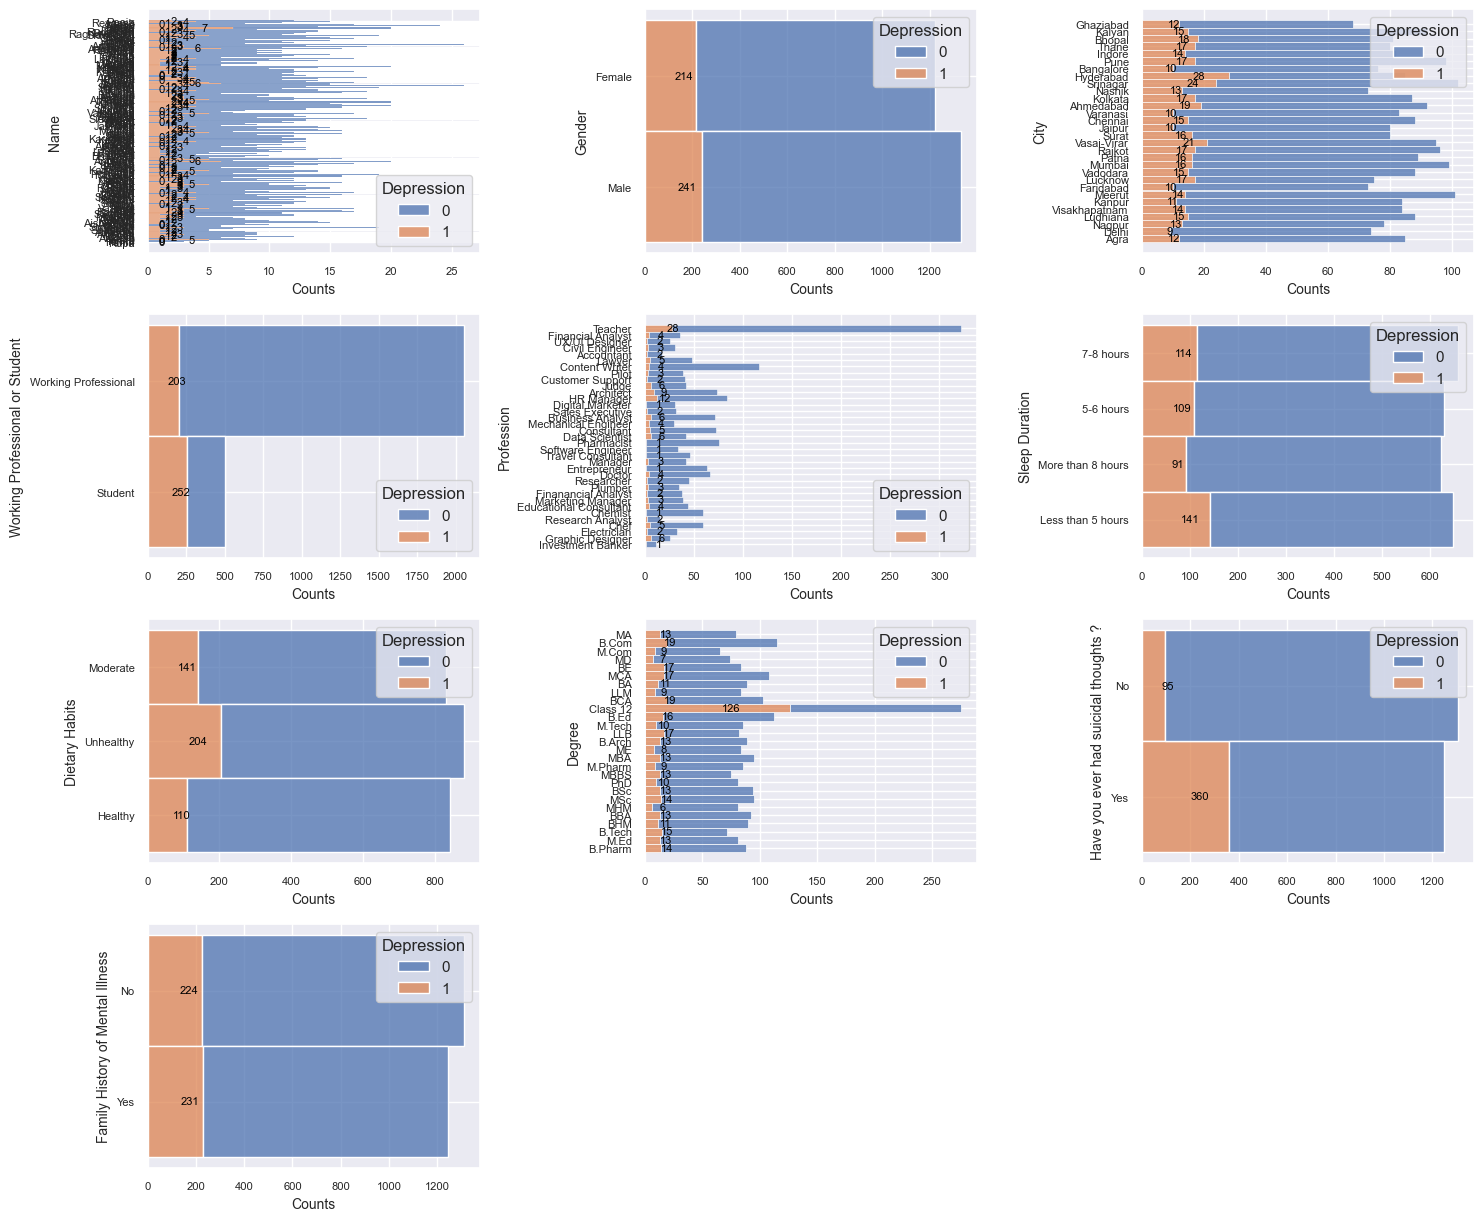

In [8]:
fig = plt.figure(figsize=(15, 15))

for i, feature in enumerate(object_cols):
    ax = fig.add_subplot(5, 3, i + 1)
    # df_temp = df[feature].value_counts().reset_index()
    sns.histplot(data=df, y=feature, hue="Depression", multiple="stack")
    # sns.barplot(df_temp, y=feature, x="count", orient="h", alpha=0.8)
    ax.bar_label(
        ax.containers[0], label_type="center", padding=10, color="black", fontsize=8
    )
    ax.set_ylabel(feature, fontsize=10)
    ax.set_xlabel("Counts", fontsize=10)
    ax.tick_params(axis="both", labelsize=8)


fig.tight_layout()
plt.show()

## N-largest 20

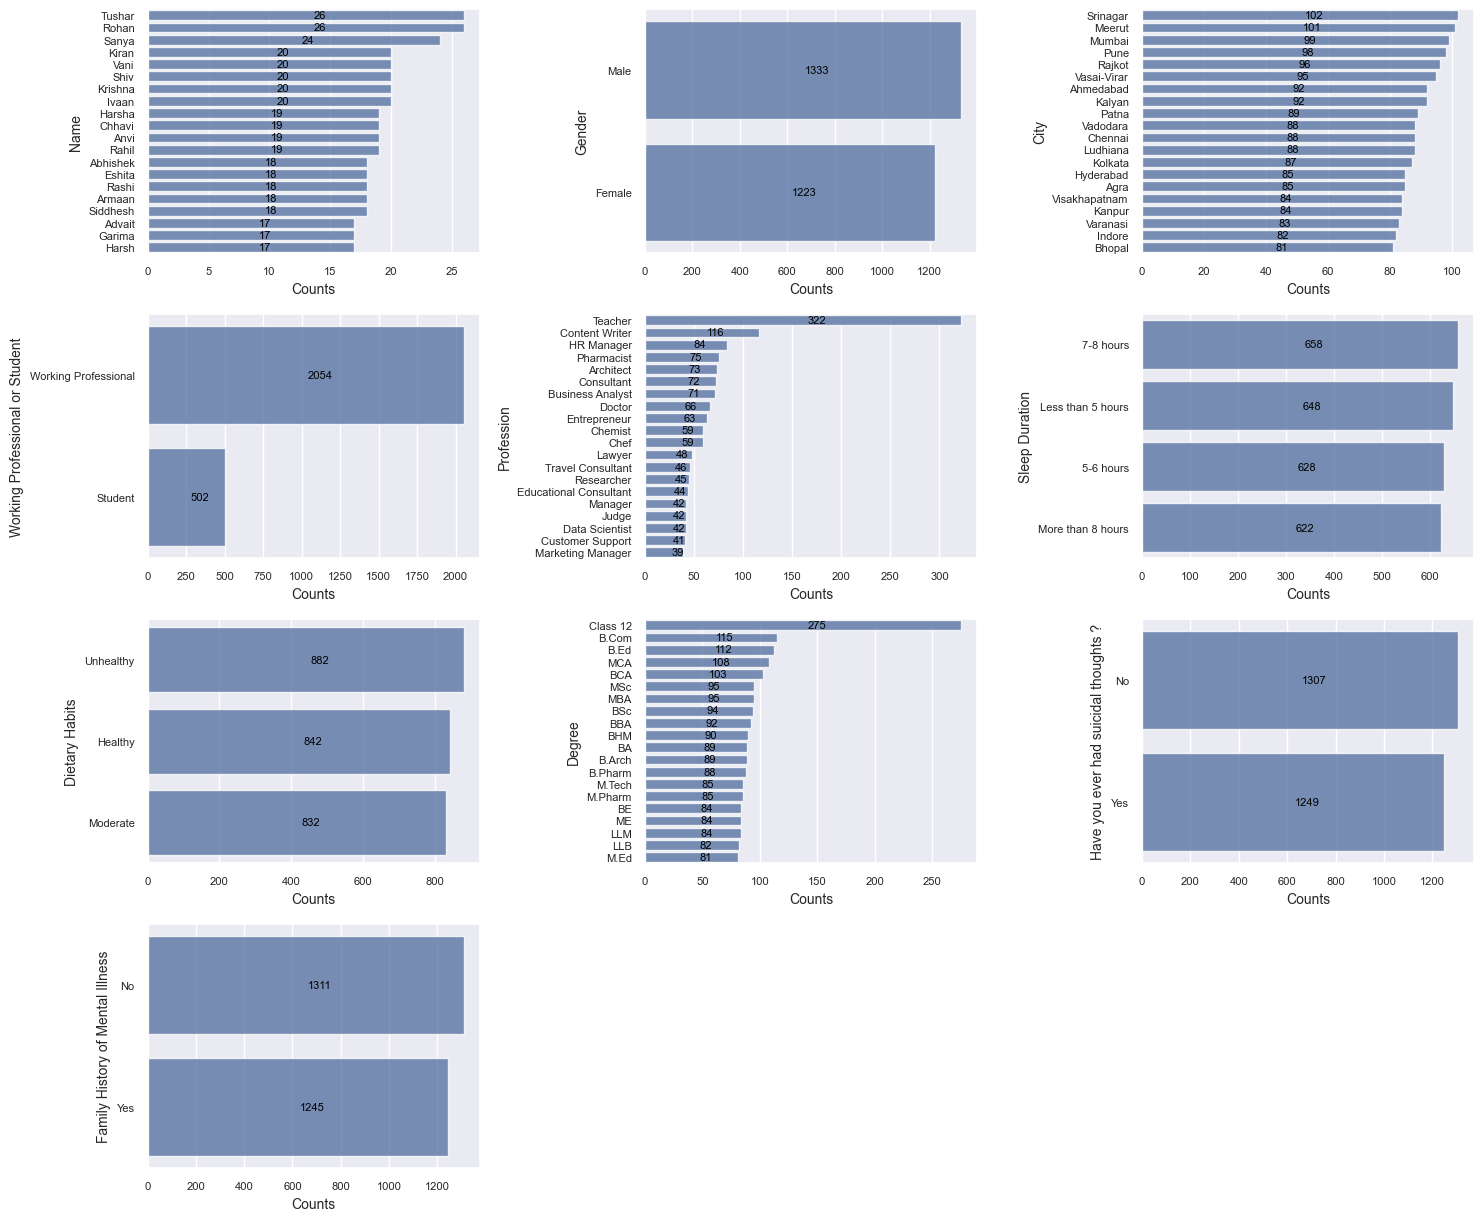

In [9]:
fig = plt.figure(figsize=(15, 15))

for i, feature in enumerate(object_cols):
    ax = fig.add_subplot(5, 3, i + 1)
    df_temp = df[feature].value_counts().nlargest(20).reset_index()
    sns.barplot(df_temp, y=feature, x="count", orient="h", alpha=0.8)
    ax.bar_label(
        ax.containers[0], label_type="center", padding=10, color="black", fontsize=8
    )
    ax.set_ylabel(feature, fontsize=10)
    ax.set_xlabel("Counts", fontsize=10)
    ax.tick_params(axis="both", labelsize=8)


fig.tight_layout()
plt.show()

## Insights till now

No columns to fix

In [10]:
# Utility for visualization
def sns_histplot(df, col):
    print(f"====={col}=====")
    print(df[col].describe())
    sns.histplot(data=df, x=col, hue="Depression", multiple="stack")
    plt.xticks(rotation=90)
    plt.show()
    print("================")

## Cleaning city

=====City=====
count         2556
unique          30
top       Srinagar
freq           102
Name: City, dtype: object


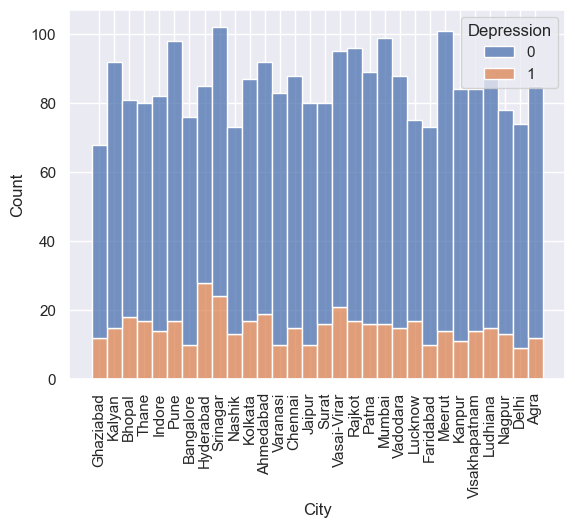

In [11]:
sns_histplot(df, "City")

In [12]:
# check unique values
df["City"].unique()


array(['Ghaziabad', 'Kalyan', 'Bhopal', 'Thane', 'Indore', 'Pune',
       'Bangalore', 'Hyderabad', 'Srinagar', 'Nashik', 'Kolkata',
       'Ahmedabad', 'Varanasi', 'Chennai', 'Jaipur', 'Surat',
       'Vasai-Virar', 'Rajkot', 'Patna', 'Mumbai', 'Vadodara', 'Lucknow',
       'Faridabad', 'Meerut', 'Kanpur', 'Visakhapatnam', 'Ludhiana',
       'Nagpur', 'Delhi', 'Agra'], dtype=object)

In [13]:
# check number of depressed per city

unique_cities = df["City"].unique()

print(f"We have {len(unique_cities)} Unique Cities")
print()

for city in unique_cities:
    print(
        f"{city} has {df[df['City']==city][df['Depression'] == 1.0].count()[0]} Depressed People."
    )

We have 30 Unique Cities

Ghaziabad has 12 Depressed People.
Kalyan has 15 Depressed People.
Bhopal has 18 Depressed People.
Thane has 17 Depressed People.
Indore has 14 Depressed People.
Pune has 17 Depressed People.
Bangalore has 10 Depressed People.
Hyderabad has 28 Depressed People.
Srinagar has 24 Depressed People.
Nashik has 13 Depressed People.
Kolkata has 17 Depressed People.
Ahmedabad has 19 Depressed People.
Varanasi has 10 Depressed People.
Chennai has 15 Depressed People.
Jaipur has 10 Depressed People.
Surat has 16 Depressed People.
Vasai-Virar has 21 Depressed People.
Rajkot has 17 Depressed People.
Patna has 16 Depressed People.
Mumbai has 16 Depressed People.
Vadodara has 15 Depressed People.
Lucknow has 17 Depressed People.
Faridabad has 10 Depressed People.
Meerut has 14 Depressed People.
Kanpur has 11 Depressed People.
Visakhapatnam has 14 Depressed People.
Ludhiana has 15 Depressed People.
Nagpur has 13 Depressed People.
Delhi has 9 Depressed People.
Agra has 12 Dep

In [14]:
# Remove fraud entries
list_of_cities_removed = []
for city in unique_cities:
    num_depressed_people = df[df["City"] == city][df["Depression"] == 1.0].count()[0]
    if num_depressed_people < 5:
        print(f"{city} has {num_depressed_people} Depressed People.")
        df = df[df["City"] != city]
        list_of_cities_removed.append(city)

=====City=====
count         2556
unique          30
top       Srinagar
freq           102
Name: City, dtype: object


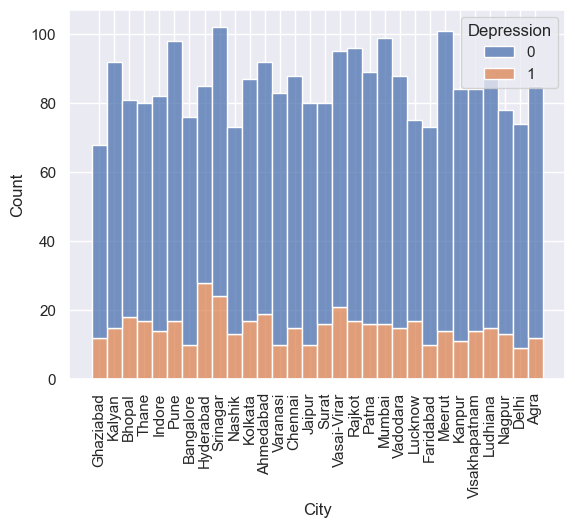

In [15]:
sns_histplot(df, "City")

## Cleaning Profession

=====Profession=====
count        1883
unique         35
top       Teacher
freq          322
Name: Profession, dtype: object


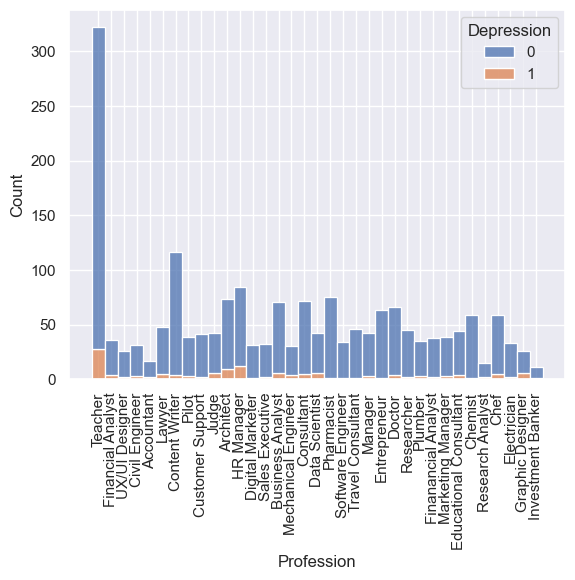

In [16]:
sns_histplot(df, "Profession")

In [17]:
df["Profession"].unique()


array(['Teacher', 'Financial Analyst', 'UX/UI Designer', 'Civil Engineer',
       'Accountant', 'Lawyer', 'Content Writer', nan, 'Pilot',
       'Customer Support', 'Judge', 'Architect', 'HR Manager',
       'Digital Marketer', 'Sales Executive', 'Business Analyst',
       'Mechanical Engineer', 'Consultant', 'Data Scientist',
       'Pharmacist', 'Software Engineer', 'Travel Consultant', 'Manager',
       'Entrepreneur', 'Doctor', 'Researcher', 'Plumber',
       'Finanancial Analyst', 'Marketing Manager',
       'Educational Consultant', 'Chemist', 'Research Analyst', 'Chef',
       'Electrician', 'Graphic Designer', 'Investment Banker'],
      dtype=object)

In [18]:
df["Profession"].value_counts()[1:35].reset_index()["Profession"].to_list()


[
    'Content Writer',
    'HR Manager',
    'Pharmacist',
    'Architect',
    'Consultant',
    'Business Analyst',
    'Doctor',
    'Entrepreneur',
    'Chemist',
    'Chef',
    'Lawyer',
    'Travel Consultant',
    'Researcher',
    'Educational Consultant',
    'Manager',
    'Judge',
    'Data Scientist',
    'Customer Support',
    'Marketing Manager',
    'Pilot',
    'Finanancial Analyst',
    'Financial Analyst',
    'Plumber',
    'Software Engineer',
    'Electrician',
    'Sales Executive',
    'Civil Engineer',
    'Digital Marketer',
    'Mechanical Engineer',
    'UX/UI Designer',
    'Graphic Designer',
    'Accountant',
    'Research Analyst',
    'Investment Banker'
]

In [19]:
pro = df["Profession"].value_counts()[1:35].reset_index()["Profession"].to_list()
df["Profession"] = np.where(df["Profession"].isin(pro), df["Profession"], "Other")

=====Profession=====
count      2556
unique       35
top       Other
freq        995
Name: Profession, dtype: object


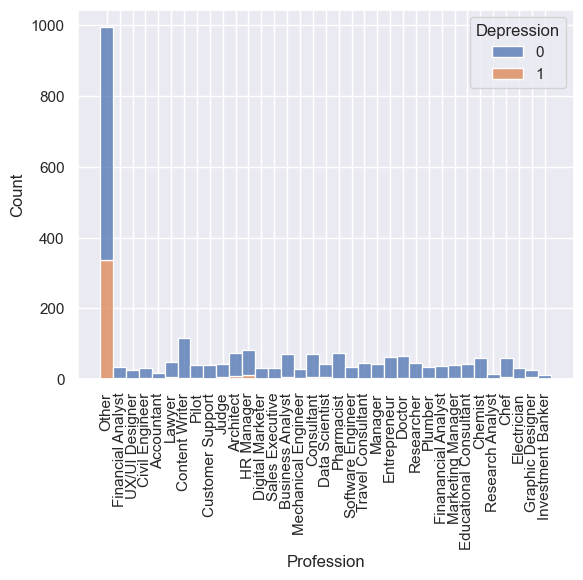

In [20]:
sns_histplot(df, "Profession")

## Cleaning Sleep Duration

=====Sleep Duration=====
count          2556
unique            4
top       7-8 hours
freq            658
Name: Sleep Duration, dtype: object


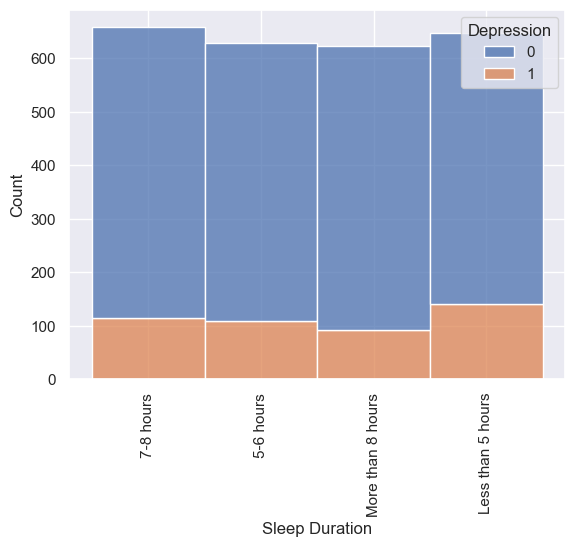

In [21]:
sns_histplot(df, "Sleep Duration")

In [22]:
sd = df["Sleep Duration"].value_counts()[0:4].reset_index()["Sleep Duration"].to_list()
df["Sleep Duration"] = np.where(
    df["Sleep Duration"].isin(sd), df["Sleep Duration"], "1-8"
)

=====Sleep Duration=====
count          2556
unique            4
top       7-8 hours
freq            658
Name: Sleep Duration, dtype: object


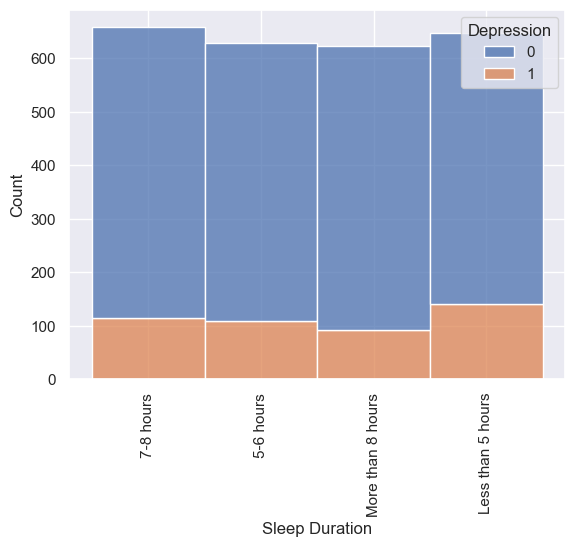

In [23]:
sns_histplot(df, "Sleep Duration")

In [24]:
df["Sleep Duration"].value_counts()


Sleep Duration
7-8 hours            658
Less than 5 hours    648
5-6 hours            628
More than 8 hours    622
Name: count, dtype: int64

## Cleaning Dietary Habits

=====Dietary Habits=====
count          2556
unique            3
top       Unhealthy
freq            882
Name: Dietary Habits, dtype: object


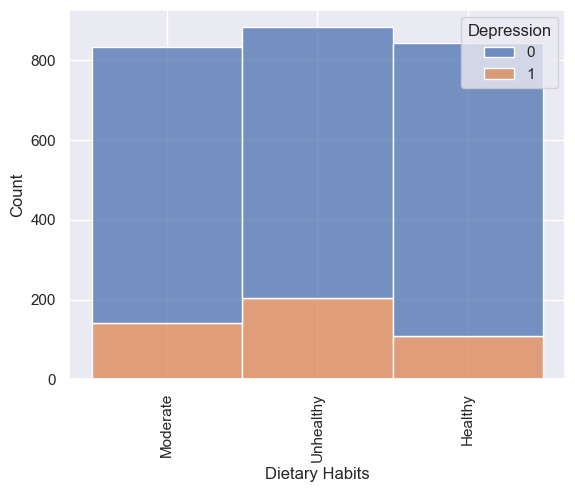

In [25]:
sns_histplot(df, "Dietary Habits")

In [26]:
dh = df["Dietary Habits"].value_counts()[0:3].reset_index()["Dietary Habits"].to_list()
df["Dietary Habits"] = np.where(
    df["Dietary Habits"].isin(dh), df["Dietary Habits"], "Moderate"
)

=====Dietary Habits=====
count          2556
unique            3
top       Unhealthy
freq            882
Name: Dietary Habits, dtype: object


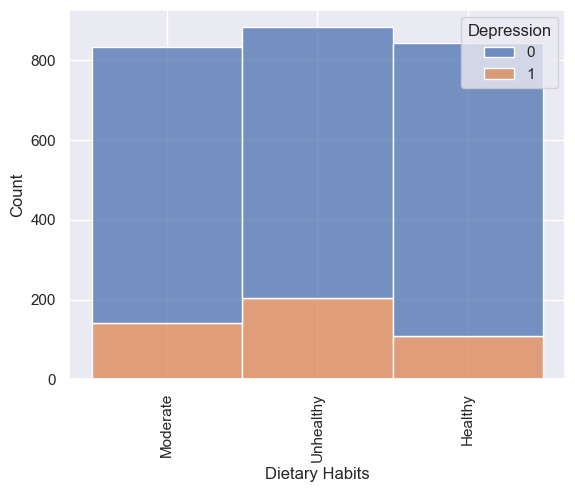

In [27]:
sns_histplot(df, "Dietary Habits")

## Cleaning Degree

=====Degree=====
count         2556
unique          27
top       Class 12
freq           275
Name: Degree, dtype: object


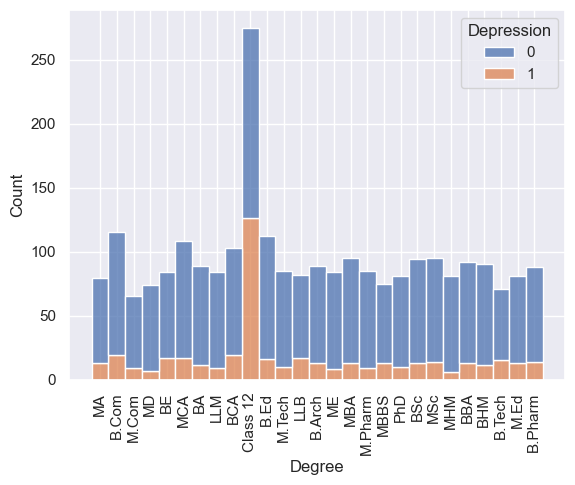

In [28]:
sns_histplot(df, "Degree")

In [29]:
deg = df["Degree"].value_counts()[:27].reset_index()["Degree"].to_list()
df["Degree"] = np.where(df["Degree"].isin(deg), df["Degree"], "Other")

=====Degree=====
count         2556
unique          27
top       Class 12
freq           275
Name: Degree, dtype: object


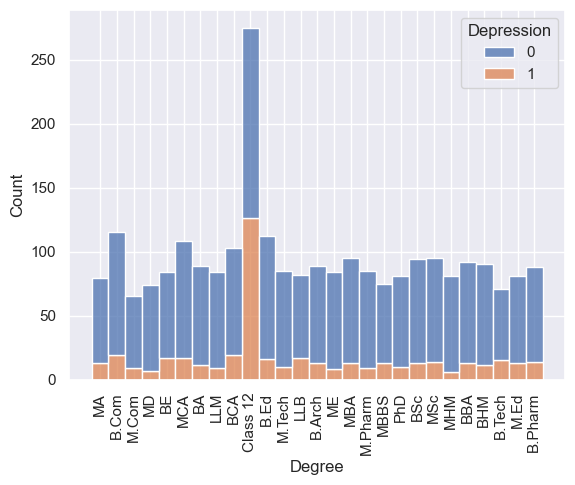

In [30]:
sns_histplot(df, "Degree")

## Plot again

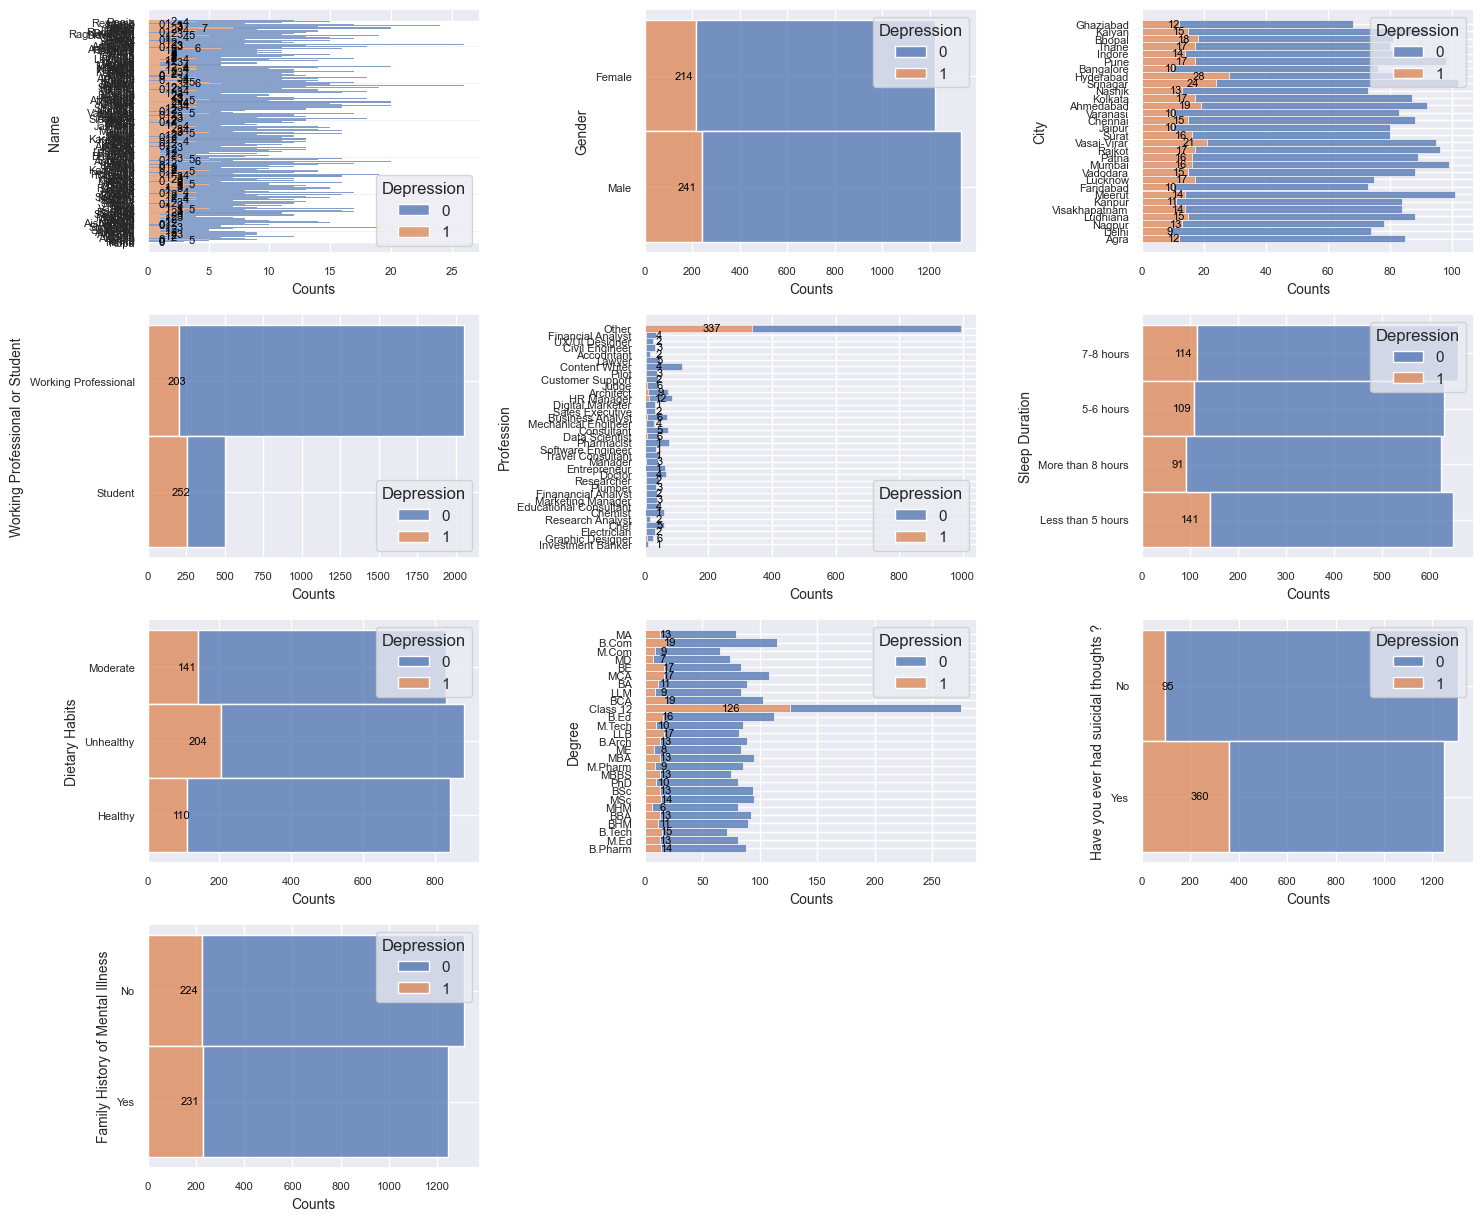

In [31]:
fig = plt.figure(figsize=(15, 15))

for i, feature in enumerate(object_cols):
    ax = fig.add_subplot(5, 3, i + 1)
    # df_temp = df[feature].value_counts().reset_index()
    sns.histplot(data=df, y=feature, hue="Depression", multiple="stack")
    # sns.barplot(df_temp, y=feature, x="count", orient="h", alpha=0.8)
    ax.bar_label(
        ax.containers[0], label_type="center", padding=10, color="black", fontsize=8
    )
    ax.set_ylabel(feature, fontsize=10)
    ax.set_xlabel("Counts", fontsize=10)
    ax.tick_params(axis="both", labelsize=8)


fig.tight_layout()
plt.show()

# Numerical Columns

In [32]:
df.describe().round(2).style.format(precision=2).background_gradient(cmap="Reds")

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,2556.00,502.00,2054.00,502.00,502.00,2054.00,2556.00,2556.00,2556.00
mean,39.04,3.00,3.02,7.57,3.08,3.02,6.02,2.97,0.18
std,12.26,1.39,1.42,1.47,1.37,1.42,3.77,1.42,0.38
min,18.00,1.00,1.00,5.03,1.00,1.00,0.00,1.00,0.00
25%,28.00,2.00,2.00,6.21,2.00,2.00,3.00,2.00,0.00
50%,39.00,3.00,3.00,7.60,3.00,3.00,6.00,3.00,0.00
75%,50.00,4.00,4.00,8.82,4.00,4.00,9.00,4.00,0.00
max,60.00,5.00,5.00,10.00,5.00,5.00,12.00,5.00,1.00


In [33]:
float_cols = [
    col
    for col in df.columns
    if ((df[col].dtype == "float64") or (df[col].dtype == "int64"))
]
float_cols


[
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress',
    'Depression'
]

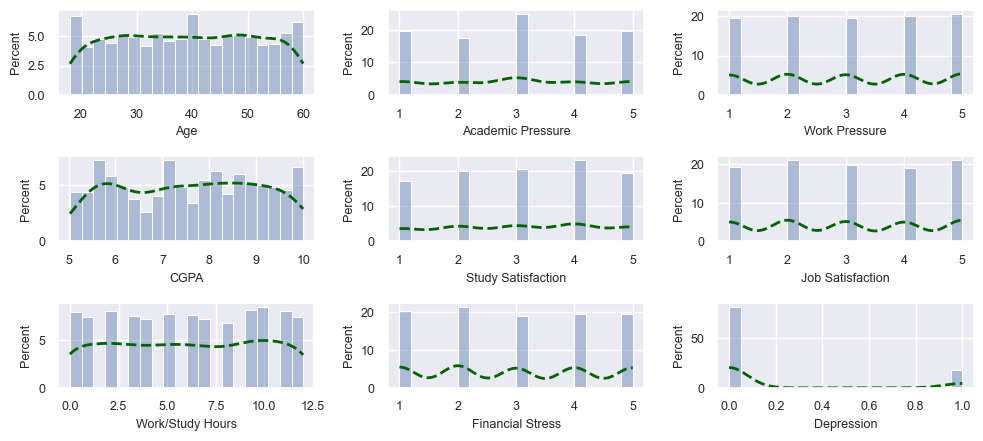

In [34]:
fig = plt.figure(figsize=(10, 10))

for i, feature in enumerate(float_cols):
    ax = fig.add_subplot(7, 3, i + 1)
    sns.histplot(
        df[feature],
        stat="percent",
        kde=True,
        bins=20,
        alpha=0.4,
        line_kws={"lw": 2, "linestyle": "dashed"},
    ).lines[0].set_color("darkgreen")
    plt.tick_params(axis="both", labelsize=9)
    plt.ylabel("Percent", fontsize=9)
    plt.xlabel(feature, fontsize=9)


fig.tight_layout()
plt.show()

In [35]:
df[float_cols].isnull().sum()


Age                      0
Academic Pressure     2054
Work Pressure          502
CGPA                  2054
Study Satisfaction    2054
Job Satisfaction       502
Work/Study Hours         0
Financial Stress         0
Depression               0
dtype: int64

## We will just fillna with 0 for now.

In [36]:
df = df.fillna(0)

In [37]:
df.isnull().sum()


Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [38]:
# catalog.save('depression_real_cleaned', df) # save once

[11/29/24 01:50:39] INFO     Saving data to depression_real_cleaned (CSVDataset)...             ]8;id=153702;file://C:\Users\divya\miniconda3\envs\mlops\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=448728;file://C:\Users\divya\miniconda3\envs\mlops\lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

# Models

## Train with Numerical data only

In [82]:
df_X = df[float_cols[:-1]]
df_y = df["Depression"]
df_X.columns


Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, shuffle=True, test_size=0.3, random_state=42
)

## Logistic Regression

### Train

In [84]:
# Train
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_preds = log_reg.predict(X_test)
print(
    f"Accuracy of logistic regression classifier on validation set: {log_reg.score(X_test, y_test):.2f}"
)

Accuracy of logistic regression classifier on validation set: 0.92


### Coefficients

In [85]:
pd.DataFrame({"coeff": log_reg.coef_[0]}, index=df_X.columns)

,coeff
Age,-0.209898
Academic Pressure,1.157654
Work Pressure,0.820277
CGPA,0.032987
Study Satisfaction,-0.796586
Job Satisfaction,-0.796321
Work/Study Hours,0.215800
Financial Stress,0.622119


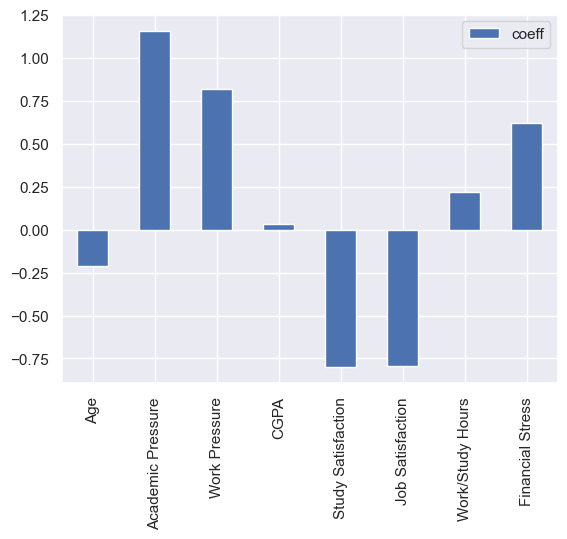

In [86]:
pd.DataFrame({"coeff": log_reg.coef_[0]}, index=df_X.columns).plot(kind="bar")
plt.show()

### Confusion Matrix

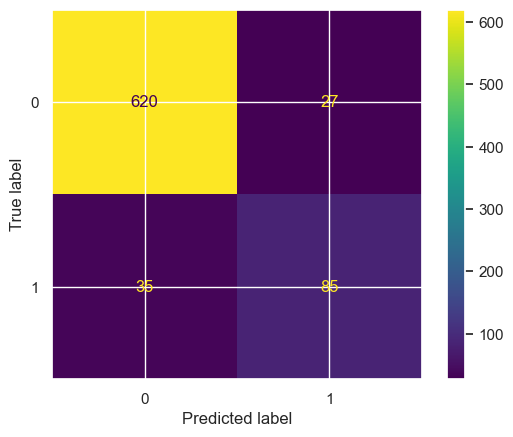

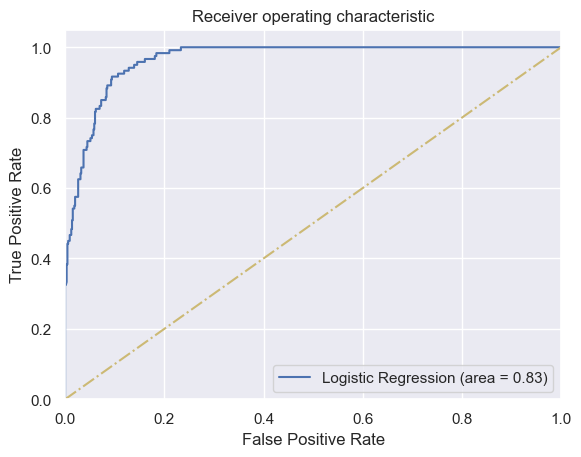

In [87]:
# Comfusion Matrix
cm_np = confusion_matrix(y_test.tolist(), y_preds.tolist())
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_np, display_labels=[0, 1]
)
cm_display.plot()
plt.show()

# ROC Curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "y-.")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

## Random Forest

In [88]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_preds = rf_clf.predict(X_test)
print(
    f"Accuracy of logistic regression classifier on validation set: {rf_clf.score(X_test, y_test):.2f}"
)

Accuracy of logistic regression classifier on validation set: 0.91


In [89]:
pd.DataFrame({"coeff": rf_clf.feature_importances_}, index=df_X.columns)

,coeff
Age,0.329834
Academic Pressure,0.130531
Work Pressure,0.088266
CGPA,0.080832
Study Satisfaction,0.065170
Job Satisfaction,0.078635
Work/Study Hours,0.134040
Financial Stress,0.092692


<Axes: >

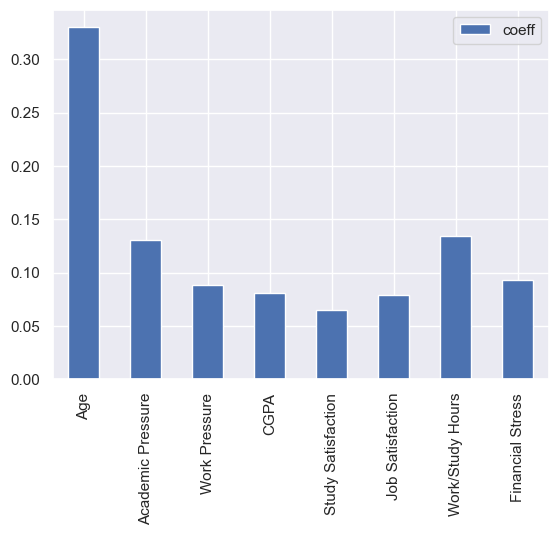

In [90]:
pd.DataFrame({"coeff": rf_clf.feature_importances_}, index=df_X.columns).plot(
    kind="bar"
)

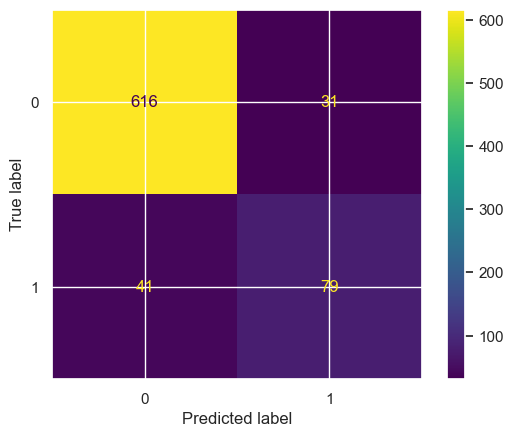

In [91]:
cm_np = confusion_matrix(y_test.tolist(), y_preds.tolist())
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_np, display_labels=[0, 1]
)
cm_display.plot()
plt.show()